# YAI 9기 겨울방학 2주차 - 활성화 함수 과제

<img src="https://i.ibb.co/tPxcj4v/1.png">

## Question 1

- (a) Activation function은 딥러닝 네트워크에서 어떤 역할을 하나요?

In [153]:
# Your answer: 1 - (a)
# 
# 

- (b) Activation function은 어떤 특성을 가지고 있어야 그 역할을 수행할 수 있나요?

In [154]:
# Your answer: 1 - (b)
# 
# 

## Question 2

아래 코드의 TODO 부분을 pytorch API를 사용해서 이 미지가 설명하고 있는 activation function을 구현해주세요. 그 후에는 딥러닝 네트워크의 손글씨 이미지 분류 성능이 활성화함수 종류에 따라 어떻게 달라지는지 확인해보세요. 그리고 custom activation function을 정의해서 성능을 확인해보세요!

- (a) 어떤 Activation function을 사용했을 때 가장 성능이 좋았고, 어떤 Activation function을 사용했을 때 가장 빠르게 모델이 학습되었나요?

In [155]:
# Your answer: 2 - (a)
# 
# 

- (b) 정의된 딥러닝 네트워크 구조를 참고해서, 왜 그런 결과가 나왔는지 분석해주세요.

In [156]:
# Your answer: 2 - (b)
# 
# 

**아래 부분의 코드를 채워주시면 됩니다.**

In [157]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import time

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(0x0621)  # 랜덤 시드 고정

In [158]:
learning_rate = 1e-2
epochs = 10
batch_size = 1024

In [159]:
mnist_train = datasets.MNIST(root='MNIST_data/', # 파일 경로 지정
                          train=True,  # True를 지정하면 훈련 데이터로 다운로드
                          transform=transforms.ToTensor(), # 텐서로 변환
                          download=True)  # True로 지정하면 파일 경로에 다운로드

mnist_test = datasets.MNIST(root='MNIST_data/', # 파일 경로 지정
                         train=False,  # False를 지정하면 테스트 데이터로 다운로드
                         transform=transforms.ToTensor(), # 텐서로 변환
                         download=False)  # mnist_train 다운로드 시 test data까지 다운로드 되므로 False로 지정해도 무관

# 데이터 로더 정의, data_loader는 generator의 형태로 iterable함. (for, while문을 사용하여 요소를 꺼낼 수 있음)
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

total_batch = len(data_loader)  # 전체 데이터 개수를 batch size로 나눈 값 = 한 에포크당 반복할 횟수

In [160]:
# Activation function 그래프 그리는 함수 정의
def plot_activation_function(function, wider=False):
    name = type(function).__name__ if isinstance(function, nn.Module) else function.__name__
    tick = np.arange(-4., 5., 1)
    x = torch.arange(tick.min(), tick.max(), 1e-3).requires_grad_()
    y = function(x)
    y.sum().backward()
    dydx = x.grad.detach()
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
    for ax, data, color, title_format in zip(axes, (y, dydx), "rb", ("{} Function", "Derivative of {}")):
        ax.axvline(0., c='k', linewidth=1., alpha=0.7)
        ax.axhline(0., c='k', linewidth=1., alpha=0.7)
        ax.plot(x.detach().numpy(), data.detach().numpy(), c=color)
        ax.set_xticks(tick)
        ax.set_yticks(tick)
        ax.set_xticks(tick, minor=True)
        ax.set_yticks(tick, minor=True)
        ax.grid(which="major",alpha=0.5)
        ax.grid(which="minor",alpha=0.5)
        ax.set_title(title_format.format(name))
    plt.show()



In [161]:
# activation funtion의 추상클래스 선언
class BaseActivation(nn.Module):  # Pytorch의 Module 클래스 상속
    def __init__(self):
        # Module을 subclassing 할 때에는 항상 super 클래스의 constructor를 호출해야 합니다.
        super(BaseActivation, self).__init__()
        ...

    def forward(self, x):
        # forward 구현 시 __call__ 도 자동으로 구현해줍니다.
        return x


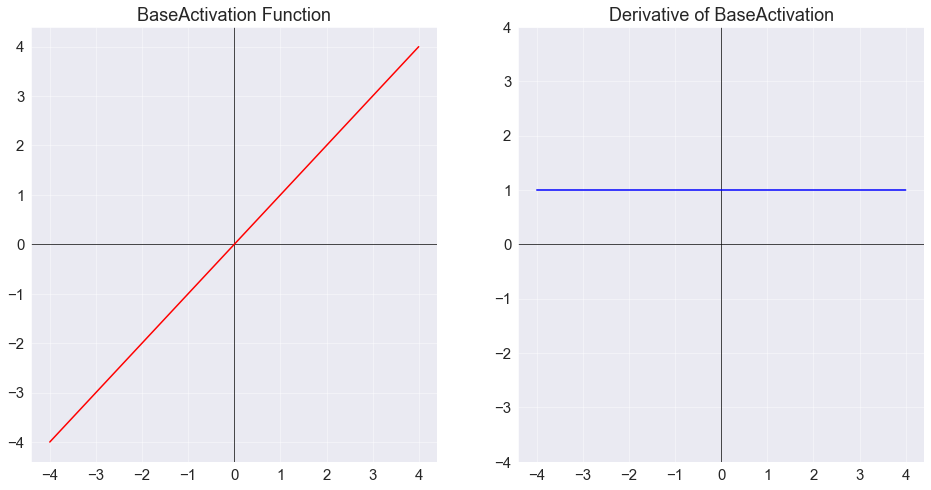

In [162]:
# 이렇게 나옵니다.
plot_activation_function(BaseActivation())

### ReLU
<img src = "https://i.ibb.co/C6tZNv0/relu.png" width="60%" height="70%">

In [163]:
# ReLU 구현
# Hint: torch.maximum와 self.zero_tensor를 활용해보세요.
class ReLU(BaseActivation):
    def __init__(self, alpha=1.0):
        super(ReLU, self).__init__()
        self.register_buffer('zero_tensor', None)
        self.zero_tensor = torch.empty(1)

    def forward(self, x):
        ################ TODO ################
        return torch.maximum(x, self.zero_tensor)
        ################ TODO ################

In [164]:
torch.maximum(torch.Tensor([[1,2],[-1,2]]), torch.empty(1))

tensor([[1., 2.],
        [0., 2.]])

In [165]:
torch.zeros(2).view(-1,1)

tensor([[0.],
        [0.]])

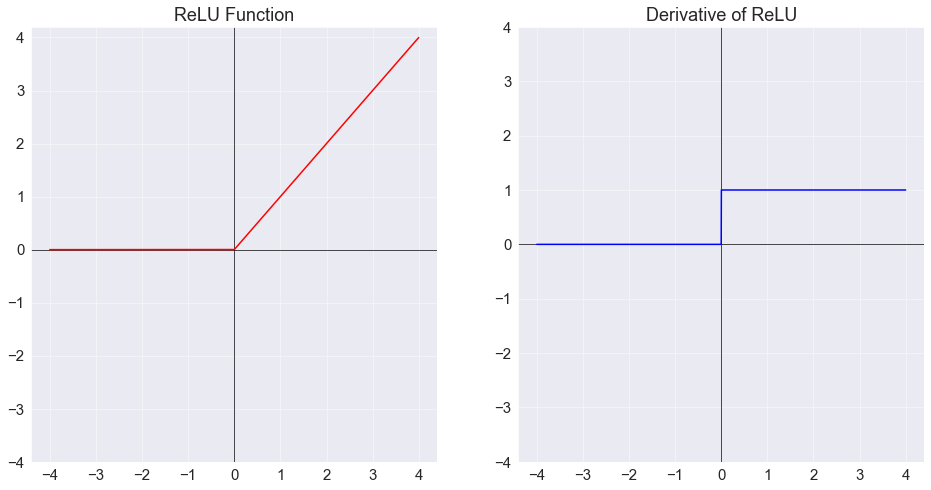

In [166]:
# ReLU 모양 확인
plot_activation_function(ReLU())

### Sigmoid
<img src = "https://i.ibb.co/27XPDNL/sigmoid.png" width="60%" height="70%">

In [167]:
# Sigmoid 구현
# Hint: torch.exp함수를 사용해보세요.
class Sigmoid(BaseActivation):
    def forward(self, x):
        ################ TODO ################
        return 1/(1+torch.exp(torch.neg(x)))
        ################ TODO ################

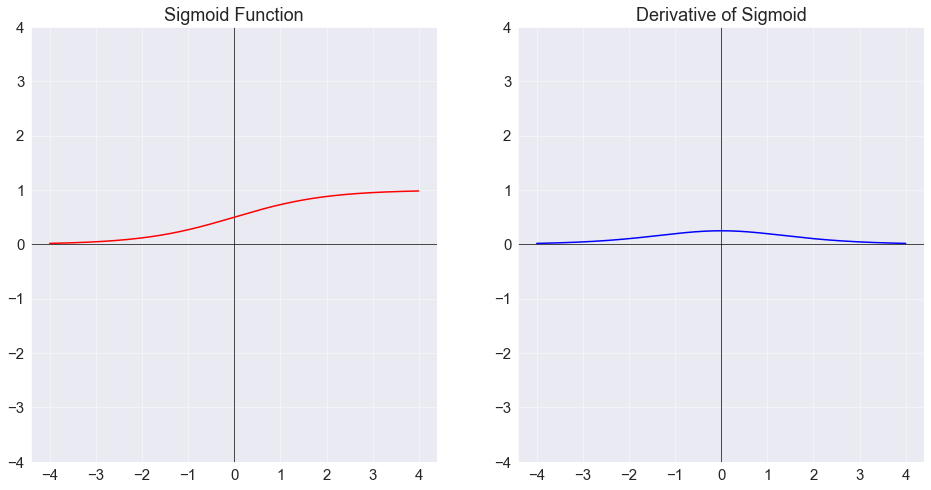

In [168]:
# Sigmoid 모양 확인
plot_activation_function(Sigmoid())

### Leaky ReLU
<img src = "https://i.ibb.co/BwR6ps3/leaky-relu.png" width="60%" height="70%">

In [169]:
# Leaky ReLU 구현
# Hint 1: torch.Tensor를 활용해서 negative slope를 정의하세요
# Hint 2: torch.where를 활용해 조건에 따른 return값을 설정해보세요
class LeakyReLU(BaseActivation):
    def __init__(self):
        super(LeakyReLU, self).__init__()
        self.register_buffer('negative_slope', None)
        ################ TODO ################
        self.negative_slope = torch.tensor([0.1])
        ################ TODO ################
        
    def forward(self, x):
        ################ TODO ################
        return torch.where(x>=0, x, self.negative_slope*x)
        ################ TODO ################

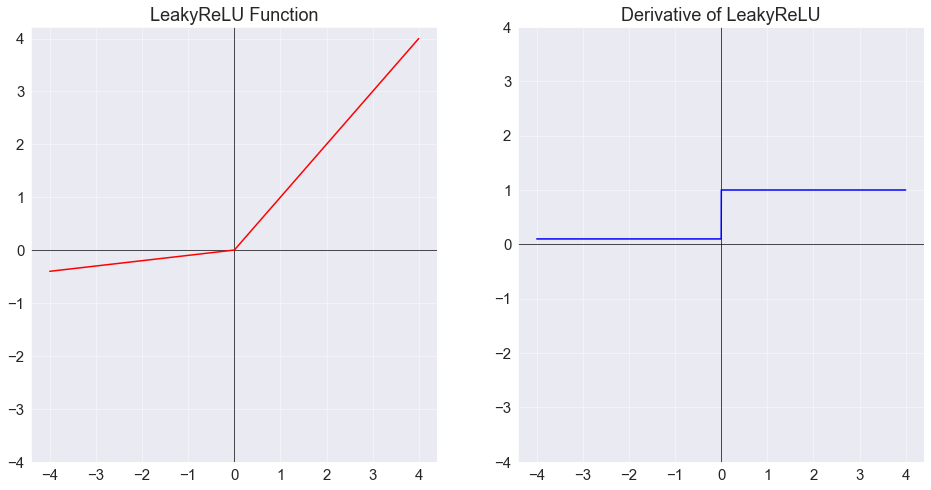

In [170]:
# Leaky ReLU 모양 확인
plot_activation_function(LeakyReLU())

### PReLU
<img src = "https://i.ibb.co/JvRb92w/prelu.png" width="60%" height="70%">

In [171]:
# PRelu 구현
# Hint: 이전과 마찬가지로 조건에 따른 return값을 설정해보세요.
class PReLU(BaseActivation):
    def __init__(self, alpha=0.25):
        super(PReLU, self).__init__()
        # pytorch에서는 gradient에 따라 update가 일어나야 하는 tensor를 Parameter로 만들어줍니다.
        self.alpha = nn.Parameter(torch.empty(1).fill_(alpha).requires_grad_())
        
    def forward(self, x):
        ################ TODO ################
        return torch.where(x>=0, x, self.alpha*x)
        ################ TODO ################


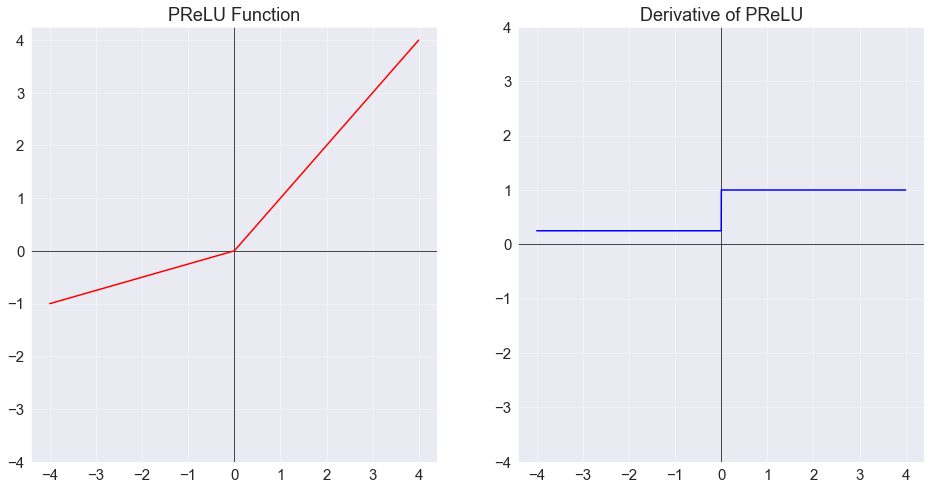

In [172]:
# PReLU 모양 확인
plot_activation_function(PReLU())

### ELU
<img src = "https://i.ibb.co/qNS6gv6/elu.png" width="60%" height="70%">

In [173]:
# ELU 구현
class ELU(BaseActivation):
    def __init__(self, alpha=1.0):
        super(ELU, self).__init__()
        self.register_buffer('alpha', None)
        self.alpha = torch.empty(1).fill_(alpha)

    def forward(self, x):
        ################ TODO ################
        return torch.where(x>=0, x, self.alpha*(torch.exp(x)-1))
        ################ TODO ################


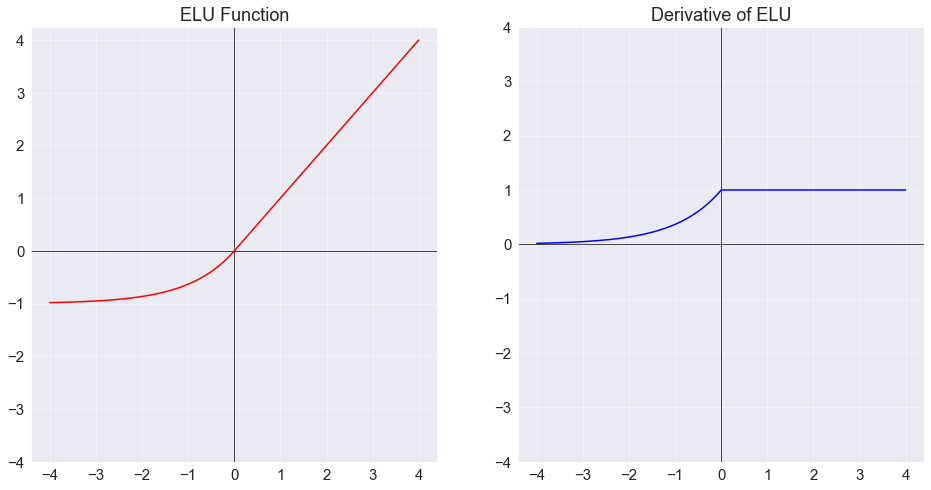

In [174]:
# ELU 모양 확인
plot_activation_function(ELU())

### SiLU
<img src = "https://i.ibb.co/sVdPrSZ/silu.png" width="60%" height="70%">

In [175]:
# SiLU 구현
# Hint: sigmoid함수의 정의를 확인해보세요.
# 참고: 나중에 접하게 될 EfficientNet 및 MobileNet의 activation 함수인 Swish와 동일합니다.
class SiLU(BaseActivation):
    def forward(self, x):
        ################ TODO ################
        return x*(1/(1+torch.exp(torch.neg(x))))
        ################ TODO ################

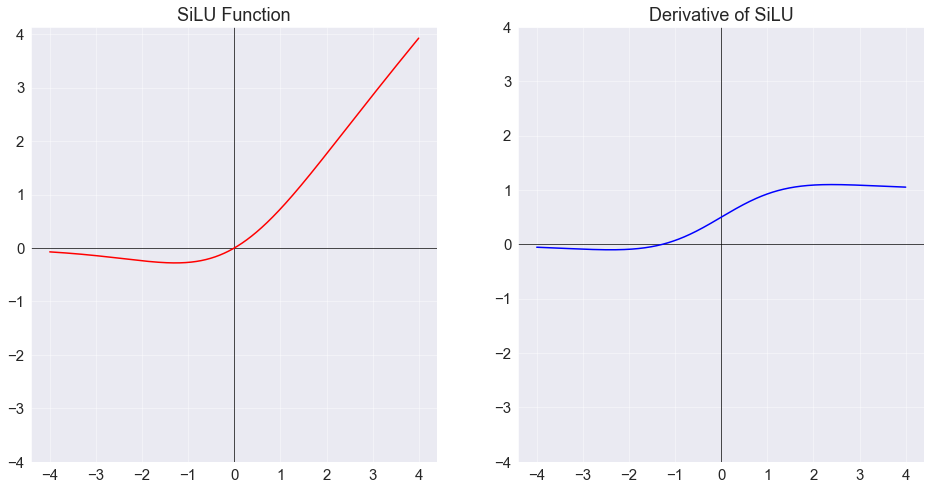

In [176]:
# SiLU 모양 확인
plot_activation_function(SiLU())

In [177]:
# Custom activation 구현
import math
class MyActivation(BaseActivation):
        
    def forward(self, x):
        ################ TODO ################
        # tanh
        #         return x
        #         return torch.cos(x)
        #         return (x-2)**2 + 8
        return (x > 0).float() * x
        ################ TODO ################

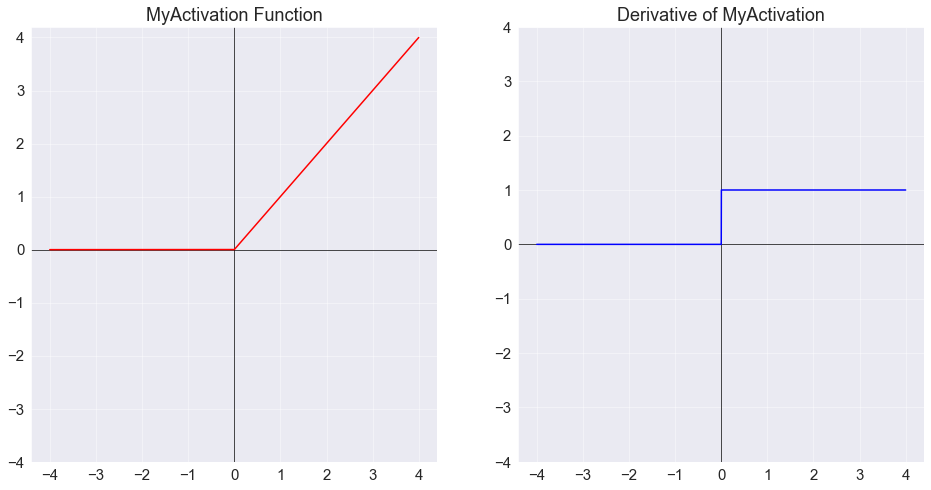

In [178]:
# Custom activation 모양 확인
plot_activation_function(MyActivation())

In [179]:
class Net(nn.Module):

    activations = ('relu', 'sigmoid', 'prelu', 'leaky_relu', 'elu', 'silu', 'custom')

    def __init__(self, use):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 64) # input image shape가 가로 28, 세로 28이므로 28*28
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 10) # 최종 예측 클래스 종류는 0~9, 10가지이므로 10개

        # use에 따라 activation 종류를 다르게 설정
        if use == 'relu':
            self.activation = ReLU()
        elif use == 'sigmoid':
            self.activation = Sigmoid()
        elif use == 'prelu':
            self.activation = PReLU()
        elif use == 'leaky_relu':
            self.activation = LeakyReLU()
        elif use == 'elu':
            self.activation = ELU()
        elif use == 'silu':
            self.activation = SiLU()
        elif use == 'custom':
            self.activation = MyActivation()
        else:
            print("Got Unknown Activation Function")
            self.activation = nn.Identity()

    # fc1 -> activation -> fc2
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = self.fc4(x)
        return x


In [180]:
# use에 맞는 모델을 생성하고, 학습시킨 후 퍼포먼스 return
def train_eval(use):
    model = Net(use).to(device)
    criterion = torch.nn.CrossEntropyLoss().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    start = time.time(); test_accs = []
    print(f"\n###### Using Activation Function: {use.upper():<10} ######")
    for epoch in range(epochs):
        avg_loss = 0
        avg_acc = 0

        for X, Y in data_loader:
            X = X.to(device)
            Y = Y.to(device)

            model.zero_grad()  # why we use zero_grad?
            prediction = model(X)
            loss = criterion(prediction, Y)
            acc = (torch.argmax(prediction, 1) == Y).float().mean().item()
            loss.backward()
            optimizer.step()

            avg_loss += loss / total_batch
            avg_acc += acc / total_batch

        print(f'[Epoch: {epoch+1:>2}] train_loss: {avg_loss:.4f}, train_acc: {avg_acc:.4f}, ', end="")

        with torch.no_grad():
            X_test = mnist_test.data.view(-1, 1, 28, 28).float().to(device)
            Y_test = mnist_test.targets.to(device)

            test_prediction = model(X_test)
            correct_prediction = torch.argmax(test_prediction, 1) == Y_test
            test_accuracy = correct_prediction.float().mean().item()
            test_accs.append(test_accuracy)
            print(f"test_acc: {test_accuracy:.4f}, best_acc: {max(test_accs):.4f}")

    return {'time': time.time() - start, 'accuracy' : max(test_accs)}

In [181]:
performance_dict = {}
# for use in Net.activations:
#     performance_dict[use] = train_eval(use)
performance_dict['custom'] = train_eval('custom')
performance_df = pd.DataFrame(performance_dict).T


###### Using Activation Function: CUSTOM     ######
[Epoch:  1] train_loss: 0.7509, train_acc: 0.7612, test_acc: 0.9087, best_acc: 0.9087
[Epoch:  2] train_loss: 0.2574, train_acc: 0.9237, test_acc: 0.9362, best_acc: 0.9362
[Epoch:  3] train_loss: 0.1755, train_acc: 0.9483, test_acc: 0.9511, best_acc: 0.9511
[Epoch:  4] train_loss: 0.1374, train_acc: 0.9590, test_acc: 0.9563, best_acc: 0.9563
[Epoch:  5] train_loss: 0.1173, train_acc: 0.9647, test_acc: 0.9561, best_acc: 0.9563


KeyboardInterrupt: 

In [ ]:
performance_df

,accuracy,time
custom,0.9513,55.136997


Best Accuracy Activation Function was: 0.9513, custom
Custom Activation Function Accuracy Rank: 1
Custom Activation Function Time Complexity Rank: 1


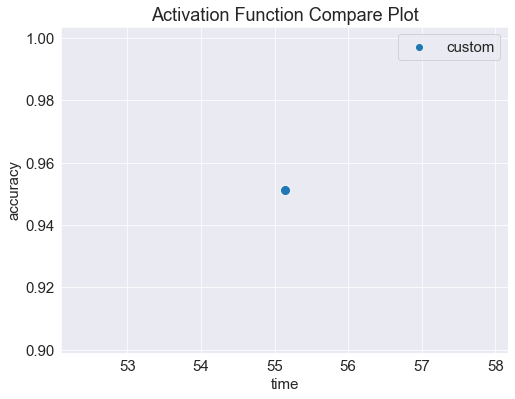

In [ ]:
print(f"Best Accuracy Activation Function was: {performance_df['accuracy'].max():.4f}, {performance_df.index[performance_df['accuracy'].argmax()]}")
print(f"Custom Activation Function Accuracy Rank: {int(performance_df['accuracy'].rank(method='max', ascending=False)['custom'])}")
print(f"Custom Activation Function Time Complexity Rank: {int(performance_df['time'].rank(method='min')['custom'])}")

plt.figure(figsize=(8, 6))
sns.set_style('darkgrid')
plt.rcParams.update({'font.size': 15})
plt.title("Activation Function Compare Plot")
sns.scatterplot(data=performance_df, x='time', y='accuracy', hue=performance_df.index, s=100)
plt.show()

In [ ]:
from torch import nn
nn.ReLU()

ReLU()